In [1]:
from pylab import *
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.font_manager import FontProperties

<IPython.core.display.Javascript object>


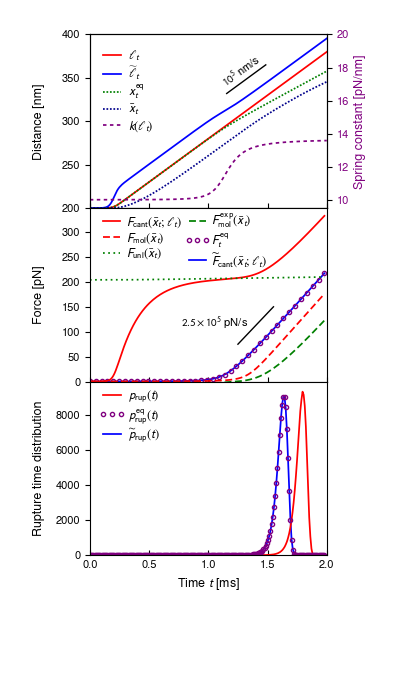

In [37]:
%matplotlib notebook
clf()
xoff=0.22
yoff=0.2
width=0.8-xoff
height=0.95-yoff


fig_width_pt = 246.0
inches_per_pt = 1.0/72.27
golden_mean = (sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height = fig_width_pt*inches_per_pt*golden_mean
fig_size =  [1.2*fig_width,3.3*fig_height]
params = {'backend': 'pdf',
          'axes.labelsize': 9,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'text.usetex': False,
          'figure.figsize': fig_size,
          'figure.subplot.left': xoff,
          'figure.subplot.bottom': yoff,
          'figure.subplot.right': xoff+width,
          'figure.subplot.top': yoff+height,
          'mathtext.fontset': 'stixsans'}

rcParams.update(params)
rc('font',**{'family':'sans-serif','sans-serif':['Tex Gyre Heros']})
        
figure(1)

gs1=gridspec.GridSpec(3,1)
gs1.update(hspace=0.0,wspace=0.2)

sta=np.loadtxt('stage_protocol_1e5.txt',delimiter='\t')
fno=np.loadtxt('forces_nocd_1e5.txt',delimiter='\t')
fcd=np.loadtxt('forces_cd_1e5.txt',delimiter='\t')
pno=np.loadtxt('pt_nocd_1e5.txt',delimiter='\t')
pcd=np.loadtxt('pt_cd_1e5.txt',delimiter='\t')
peq=np.loadtxt('pt_eq_1e5.txt',delimiter='\t')
xeq=np.loadtxt('../xeq_t.txt',delimiter='\t')
ktt=np.loadtxt('../ktot_t.txt',delimiter='\t')
xb=np.loadtxt('../xb.txt',delimiter='\t')
subplot(gs1[0,0])

l1,=plot([e[0]/1e-3 for e in sta],[e[1] for e in sta],color='r',lw=1.25)
l2,=plot([e[0]/1e-3 for e in sta],[e[2] for e in sta],color='b',lw=1.25)
l3,=plot([e[0]/1e-3 for e in xeq],[e[1] for e in xeq],color='g',lw=1.25)    
l3.set_dashes([1,1])
l5,=plot([e[0]/1e-3 for e in xb],[e[1] for e in xb],color='DarkBlue',lw=1.25)    
l5.set_dashes([1,1])

plot([1.0+0.135+0.02,1.33+0.135+0.02],[10+332.0-10,10+332.0+0.33*1e5*1e-3-10],color='k',lw=1)
text(0.97+0.1+0.02,250+100-10,r'$10^5$ nm/s',fontsize=8,rotation=36)

setp(gca(),xlim=[0,2],ylim=[200,400],xticklabels=[])
gca().tick_params(axis='x',which='both',direction="in")
ylabel(r'Distance [nm]')
gca().yaxis.set_label_coords(-0.19,0.5)

ax2 = gca().twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Spring constant [pN/nm]', color='Purple')
l4,=ax2.plot([e[0]/1e-3 for e in ktt],[e[1] for e in ktt], color='Purple',lw=1.25)
l4.set_dashes([2,2])
ax2.tick_params(axis='y', labelcolor='Purple')
setp(ax2,ylim=[9.5,20])

leg=legend([l1,l2,l3,l5,l4],[r'$\ell_t$',r'$\widetilde{\ell}_t$',r'$x^{\rm eq}_t$',r'$\bar{x}_t$',r'$k(\ell_t)$'],loc=(0.02,0.4),numpoints=3,prop = FontProperties(size=9),ncol=1,labelspacing=0.1,handlelength=2.0,handletextpad=0.3)
leg.draw_frame(0)

subplot(gs1[1,0])

fsc,=plot([e[0]/1e-3 for e in fcd],[e[1] for e in fcd],color='b',lw=1.25)
feq,=plot([e[0]/1e-3 for e in fno[::5]],[e[1] for e in fno[::5]],'go',mec='Purple',mfc='None',ms=3,mew=1)
#feq.set_dashes([2,2])

fsn,=plot([e[0]/1e-3 for e in fno],[e[2] for e in fno],color='r',lw=1.25)
fsn.set_dashes([4,2])

fspn,=plot([e[0]/1e-3 for e in fno],[e[3] for e in fno],color='r',lw=1.25)

fd,=plot([e[0]/1e-3 for e in fno],[e[4] for e in fno],color='g',lw=1.25)
fd.set_dashes([1,2])

fdiff,=plot([e[0]/1e-3 for e in fno],[e[3]-e[4] for e in fno],color='g',lw=1.25)
fdiff.set_dashes([4,2])

plot([0.25+1.0,0.25+1.3],[75.0,75+0.3*2.5e5*1e-3],color='k',lw=1)
text(0.77,110,r'$2.5\times 10^5$ pN/s',fontsize=8)


setp(gca(),xlim=[0,2],ylim=[0,350-2],xticklabels=[])
gca().tick_params(axis='x',which='both',direction="in")
ylabel(r'Force [pN]')
gca().yaxis.set_label_coords(-0.19,0.5)

leg=legend([fspn,fsn,fd,fdiff,feq,fsc],[r'$F_{\rm cant}(\bar{x}_t;\ell_t)$',r'$F_{\rm mol}(\bar{x}_t)$',r'$F_{\rm unl}(\bar{x}_t)$',r'$F^{\rm exp}_{\rm mol}(\bar{x}_t)$',r'$F^{\rm eq}_t$',r'$\widetilde{F}_{\rm cant}(\bar{x}_t;\ell_t)$'],loc=(0.02,0.62),numpoints=3,prop = FontProperties(size=9),ncol=2,columnspacing=0.25,labelspacing=0.1,handlelength=1.95,handletextpad=0.15)
leg.draw_frame(0)


subplot(gs1[2,0])

l3,=plot([e[0]/1e-3 for e in pcd],[e[1] for e in pcd],color='b',lw=1.25)
#feq,=plot([e[0]/1e-3 for e in fno[::5]],[e[1] for e in fno[::5]],'go',mec='Purple',mfc='None',ms=3,mew=1)
#feq.set_dashes([2,2])

l1,=plot([e[0]/1e-3 for e in pno],[e[1] for e in pno],color='r',lw=1.25)

l2,=plot([e[0]/1e-3 for e in peq[::1]],[e[1] for e in peq[::1]],'go',mec='Purple',mfc='None',ms=3,mew=1)

leg=legend([l1,l2,l3],[r'$p_{\rm rup}(t)$',r'$p^{\rm eq}_{\rm rup}(t)$',r'$\widetilde{p}_{\rm rup}(t)$'],loc=(0.02,0.61),numpoints=3,prop = FontProperties(size=9),ncol=1,labelspacing=0.1,handlelength=2,handletextpad=0.3)
leg.draw_frame(0)


setp(gca(),xlim=[0,2],ylim=[0,9900])
gca().tick_params(axis='x',which='both',direction="in")
ylabel(r'Rupture time distribution')
gca().yaxis.set_label_coords(-0.19,0.5)

xlabel(r'Time $t$ [ms]')

show()
savefig('pulling_figs.svg')

<IPython.core.display.Javascript object>


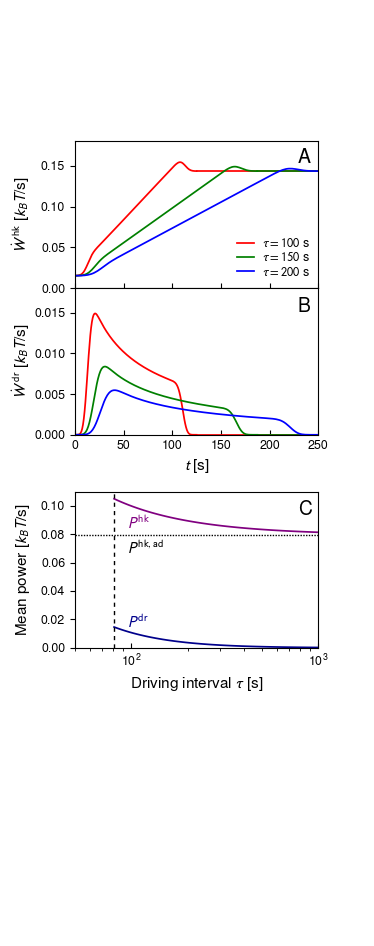

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


In [63]:
%matplotlib notebook
clf()
xoff=0.2
yoff=0.15
width=0.85-xoff
height=0.85-yoff

fig_width_pt = 246.0
inches_per_pt = 1.0/72.27
golden_mean = (sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height = fig_width_pt*inches_per_pt*golden_mean
fig_size =  [1.1*fig_width,4.5*fig_height]
params = {'backend': 'pdf',
        'axes.labelsize': 11,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'text.usetex': False,
        'figure.figsize': fig_size,
        'figure.subplot.left': xoff,
        'figure.subplot.bottom': yoff,
        'figure.subplot.right': xoff+width,
        'figure.subplot.top': yoff+height,
        'mathtext.fontset': 'stixsans'
        }

rcParams.update(params)
rc('font',**{'family':'sans-serif','sans-serif':['Tex Gyre Heros']})
        
figure(1)
        
gs1=gridspec.GridSpec(2,1)
gs1.update(hspace=0.0,top=0.48)
        
etab=np.loadtxt('etab.txt',delimiter='\t')

#subplot(gs1[0,0])
        
#plot([e[0] for e in etab],[e[1] for e in etab],color='r',lw=1.25)
#plot([e[0] for e in etab],[e[2] for e in etab],color='b',lw=1.25)
#l1,=plot([etab[0][0],etab[0][0]],[5,100],linewidth=1,color='k')
#l1.set_dashes([3,3])

#gca().set_xscale('log')
#gca().set_yscale('log')
        
#setp(gca(),xlim=[50,1000],ylim=[5,100],xticklabels=[])
#ylabel(r'Work [$k_B T$]')
#gca().yaxis.set_label_coords(-0.175,0.5)
#gca().tick_params(axis='x',which='both',direction="in")

#text(65.0,70,'enzymatic limit',fontsize=9,rotation=90)
#text(100.0,17.0,r'$\Delta W^{\rm diss}$',fontsize=11,color='r')
#text(100.0,7.5,r'$\Delta W^{\rm hk}$',fontsize=11,color='b')

############################################
############################################

subplot(gs1[0,0])

plot([e[0] for e in etab],[e[1]/e[0]-e[2]/e[0] for e in etab],color='DarkBlue',lw=1.25)
plot([e[0] for e in etab],[e[2]/e[0] for e in etab],color='Purple',lw=1.25)
l1,=plot([etab[0][0],etab[0][0]],[0.0,14],linewidth=1,color='k')
l1.set_dashes([3,3])
l2,=plot([50,1000],[0.0793888,0.0793888],linewidth=1,color='k')
l2.set_dashes([1,1])
        
gca().set_xscale('log')
        
setp(gca(),xlim=[50,1000],ylim=[0.0,0.11])
ylabel(r'Mean power [$k_B T/$s]')
xlabel(r'Driving interval $\tau$ [s]')
gca().yaxis.set_label_coords(-0.175,0.5)
gca().tick_params(axis='x',direction="in")

text(95.0,0.014,r'$P^{\rm dr}$',fontsize=11,color='DarkBlue')
text(95.0,0.0834,r'$P^{\rm hk}$',fontsize=11,color='Purple')
text(95.0,0.066,r'$P^{\rm hk,ad}$',fontsize=11,color='k')
    
############################################
############################################

gs2=gridspec.GridSpec(2,1)
gs2.update(hspace=0.0,bottom=0.54)
        
ptab100=np.loadtxt('ptab_100.txt',delimiter='\t')
ptab150=np.loadtxt('ptab_150.txt',delimiter='\t')
ptab200=np.loadtxt('ptab_200.txt',delimiter='\t')

subplot(gs2[0,0])
        
l1,=plot([e[0] for e in ptab100],[e[2] for e in ptab100],color='r',lw=1.25)
plot([ptab100[-1][0],250.0],[ptab100[-1][2],ptab100[-1][2]],color='r',lw=1.25)
l2,=plot([e[0] for e in ptab150],[e[2] for e in ptab150],color='g',lw=1.25)
plot([ptab150[-1][0],250.0],[ptab150[-1][2],ptab150[-1][2]],color='g',lw=1.25)
l3,=plot([e[0] for e in ptab200],[e[2] for e in ptab200],color='b',lw=1.25)
        
setp(gca(),xlim=[0,250],ylim=[0,0.18],xticklabels=[])
ylabel(r'$\dot{W}^{\rm \:\:hk}$ [$k_B T$/s]')
gca().yaxis.set_label_coords(-0.175,0.5)
gca().tick_params(axis='x',which='both',direction="in")

leg=legend([l1,l2,l3],[r'$\tau = 100$ s',r'$\tau = 150$ s',r'$\tau = 200$ s'],loc=(0.63,0.03),numpoints=3,prop = FontProperties(size=9),ncol=1,labelspacing=0.1,handlelength=2,handletextpad=0.3)
leg.draw_frame(0)


############################################
        
subplot(gs2[1,0])
        
plot([e[0] for e in ptab100],[e[1] for e in ptab100],color='r',lw=1.25)
plot([ptab100[-1][0],250.0],[ptab100[-1][1],ptab100[-1][1]],color='r',lw=1.25)
plot([e[0] for e in ptab150],[e[1] for e in ptab150],color='g',lw=1.25)
plot([ptab150[-1][0],250.0],[ptab150[-1][1],ptab150[-1][1]],color='g',lw=1.25)
plot([e[0] for e in ptab200],[e[1] for e in ptab200],color='b',lw=1.25)
        
setp(gca(),xlim=[0,250],ylim=[0,0.018])
ylabel(r'$\dot{W}^{\rm \:\:dr}$ [$k_B T$/s]')
xlabel(r'$t$ [s]')
gca().yaxis.set_label_coords(-0.175,0.5)
gca().tick_params(axis='x',direction="in")

figtext(0.795,0.827,'A',fontsize=14)
figtext(0.795,0.67,'B',fontsize=14)
figtext(0.795,0.455,'C',fontsize=14)


############################################
fign='power'
show()
savefig(fign+'.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


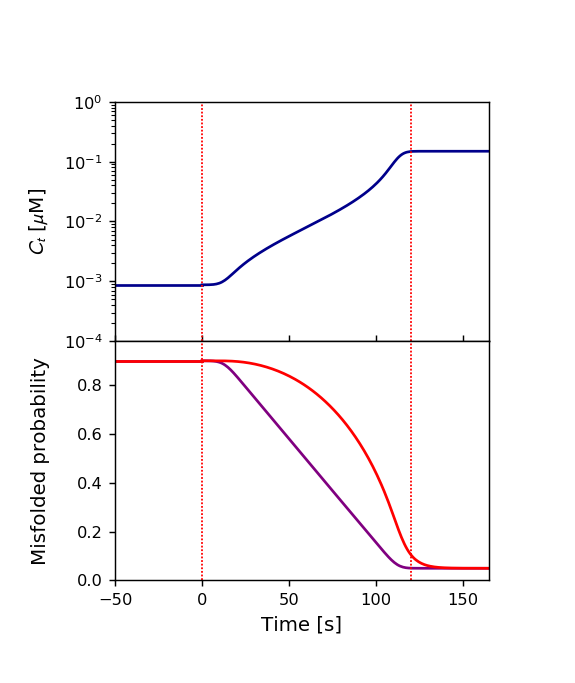

In [38]:
%matplotlib notebook
clf()
xoff=0.2
yoff=0.15
width=0.85-xoff
height=0.85-yoff

fig_width_pt = 246.0
inches_per_pt = 1.0/72.27
golden_mean = (sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height = fig_width_pt*inches_per_pt*golden_mean
fig_size =  [1.4*fig_width,2.5*fig_height]
params = {'backend': 'pdf',
        'axes.labelsize': 11,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'text.usetex': False,
        'figure.figsize': fig_size,
        'figure.subplot.left': xoff,
        'figure.subplot.bottom': yoff,
        'figure.subplot.right': xoff+width,
        'figure.subplot.top': yoff+height,
        'mathtext.fontset': 'stixsans'
        }

rcParams.update(params)
rc('font',**{'family':'sans-serif','sans-serif':['Tex Gyre Heros']})
        
figure(1)
        
gs1=gridspec.GridSpec(2,1)
gs1.update(hspace=0.0)
        
peq=np.loadtxt('peq_samp.txt',delimiter='\t')
p=np.loadtxt('p_samp.txt',delimiter='\t')

c=np.loadtxt('c_samp.txt',delimiter='\t')

subplot(gs1[0,0])

plot([-50.0, 0.0],[c[0][1]/1e-6,c[0][1]/1e-6],color='DarkBlue',lw=1.5)
plot([e[0] for e in c],[e[1]/1e-6 for e in c],color='DarkBlue',lw=1.5)
l1,=plot([0.0,0.0],[1e-4,1.0],linewidth=1,color='r')
l1.set_dashes([1,1])
l2,=plot([120,120],[1e-4,1.0],linewidth=1,color='r')
l2.set_dashes([1,1])
        
gca().set_yscale('log')
        
setp(gca(),xlim=[-50,165],ylim=[1e-4,1.0],xticklabels=[])
ylabel(r'$C_t$ [$\mu$M]')
#xlabel(r'Time [s]')
gca().yaxis.set_label_coords(-0.175,0.5)
gca().tick_params(axis='x',direction="in")

subplot(gs1[1,0])

plot([-50.0, 0.0],[peq[0][1],peq[0][1]],color='Purple',lw=1.5)
plot([e[0] for e in peq],[e[1] for e in peq],color='Purple',lw=1.5)
plot([-50.0, 0.0],[p[0][1],p[0][1]],color='r',lw=1.5)
plot([e[0] for e in p],[e[1] for e in p],color='r',lw=1.5)

l1,=plot([0.0,0.0],[0,1.0],linewidth=1,color='r')
l1.set_dashes([1,1])
l2,=plot([120,120],[0,1.0],linewidth=1,color='r')
l2.set_dashes([1,1])
                
setp(gca(),xlim=[-50,165],ylim=[0,0.98])
ylabel(r'Misfolded probability')
xlabel(r'Time [s]')
gca().yaxis.set_label_coords(-0.175,0.5)
#gca().tick_params(axis='x',direction="in")

    
############################################
############################################
fign='protocol0'
show()
savefig(fign+'.svg',bbox_inches='tight')

<IPython.core.display.Javascript object>


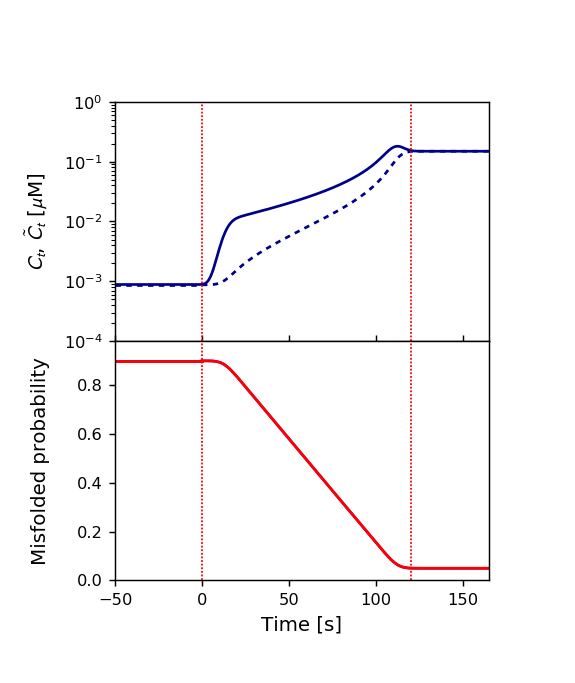

In [13]:
%matplotlib notebook
clf()
xoff=0.2
yoff=0.15
width=0.85-xoff
height=0.85-yoff

fig_width_pt = 246.0
inches_per_pt = 1.0/72.27
golden_mean = (sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height = fig_width_pt*inches_per_pt*golden_mean
fig_size =  [1.25*fig_width,2.5*fig_height]
params = {'backend': 'pdf',
        'axes.labelsize': 11,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'text.usetex': False,
        'figure.figsize': fig_size,
        'figure.subplot.left': xoff,
        'figure.subplot.bottom': yoff,
        'figure.subplot.right': xoff+width,
        'figure.subplot.top': yoff+height,
        'mathtext.fontset': 'stixsans'
        }

rcParams.update(params)
rc('font',**{'family':'sans-serif','sans-serif':['Tex Gyre Heros']})
        
figure(1)
        
gs1=gridspec.GridSpec(2,1)
gs1.update(hspace=0.0)

pcd=np.loadtxt('pcd_samp.txt',delimiter='\t')

peq=np.loadtxt('peq_samp.txt',delimiter='\t')
p=np.loadtxt('p_samp.txt',delimiter='\t')

c=np.loadtxt('c_samp.txt',delimiter='\t')
cv=np.loadtxt('cv_samp.txt',delimiter='\t')
atp=np.loadtxt('atp_samp.txt',delimiter='\t')

subplot(gs1[0,0])

l1,=plot([-50.0, 0.0],[c[0][1]/1e-6,c[0][1]/1e-6],color='DarkBlue',lw=1.5)
l1.set_dashes([2,2])
l1,=plot([e[0] for e in c],[e[1]/1e-6 for e in c],color='DarkBlue',lw=1.5)
l1.set_dashes([2,2])
plot([-50.0, 0.0],[cv[0][1]/1e-6,cv[0][1]/1e-6],color='DarkBlue',lw=1.5)
plot([e[0] for e in cv],[e[1]/1e-6 for e in cv],color='DarkBlue',lw=1.5)

l1,=plot([0.0,0.0],[1e-4,1.0],linewidth=1,color='r')
l1.set_dashes([1,1])
l2,=plot([120,120],[1e-4,1.0],linewidth=1,color='r')
l2.set_dashes([1,1])
        
gca().set_yscale('log')
        
setp(gca(),xlim=[-50,165],ylim=[1e-4,1.0],xticklabels=[])
ylabel(r'$C_t$, $\tilde{C}_t$ [$\mu$M]')
#xlabel(r'Time [s]')
gca().yaxis.set_label_coords(-0.175,0.5)
gca().tick_params(axis='x',direction="in")

subplot(gs1[1,0])

plot([-50.0, 0.0],[peq[0][1],peq[0][1]],color='Purple',lw=1.5)
plot([e[0] for e in peq],[e[1] for e in peq],color='Purple',lw=1.5)
plot([-50.0, 0.0],[p[0][1],p[0][1]],color='r',lw=1.5)
plot([e[0] for e in pcd],[e[1] for e in pcd],color='r',lw=1.5)

l1,=plot([0.0,0.0],[0,1.0],linewidth=1,color='r')
l1.set_dashes([1,1])
l2,=plot([120,120],[0,1.0],linewidth=1,color='r')
l2.set_dashes([1,1])
                
setp(gca(),xlim=[-50,165],ylim=[0,0.98])
ylabel(r'Misfolded probability')
xlabel(r'Time [s]')
gca().yaxis.set_label_coords(-0.175,0.5)
#gca().tick_params(axis='x',direction="in")

    
############################################
############################################
fign='protocolcd0'
show()
savefig(fign+'.svg',bbox_inches='tight')

<IPython.core.display.Javascript object>


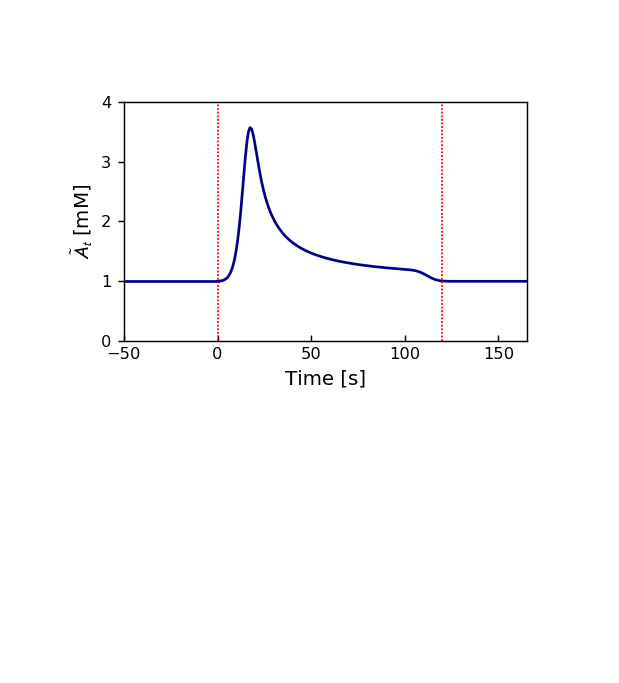

In [9]:
%matplotlib notebook
clf()
xoff=0.2
yoff=0.15
width=0.85-xoff
height=0.85-yoff

fig_width_pt = 246.0
inches_per_pt = 1.0/72.27
golden_mean = (sqrt(5)-1.0)/2.0
fig_width = fig_width_pt*inches_per_pt
fig_height = fig_width_pt*inches_per_pt*golden_mean
fig_size =  [1.4*fig_width,2.5*fig_height]
params = {'backend': 'pdf',
        'axes.labelsize': 11,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'text.usetex': False,
        'figure.figsize': fig_size,
        'figure.subplot.left': xoff,
        'figure.subplot.bottom': yoff,
        'figure.subplot.right': xoff+width,
        'figure.subplot.top': yoff+height,
        'mathtext.fontset': 'stixsans'
        }

rcParams.update(params)
rc('font',**{'family':'sans-serif','sans-serif':['Tex Gyre Heros']})
        
figure(1)
        
gs1=gridspec.GridSpec(2,1)
gs1.update(hspace=0.0)

pcd=np.loadtxt('pcd_samp.txt',delimiter='\t')

peq=np.loadtxt('peq_samp.txt',delimiter='\t')
p=np.loadtxt('p_samp.txt',delimiter='\t')

c=np.loadtxt('c_samp.txt',delimiter='\t')
cv=np.loadtxt('cv_samp.txt',delimiter='\t')
atp=np.loadtxt('atp_samp.txt',delimiter='\t')

subplot(gs1[0,0])


plot([-50.0, 0.0],[atp[0][1],atp[0][1]],color='DarkBlue',lw=1.5)
plot([e[0] for e in atp],[e[1] for e in atp],color='DarkBlue',lw=1.5)

l1,=plot([0.0,0.0],[0,4.0],linewidth=1,color='r')
l1.set_dashes([1,1])
l2,=plot([120,120],[0,4.0],linewidth=1,color='r')
l2.set_dashes([1,1])
        
setp(gca(),xlim=[-50,165],ylim=[0,4])
ylabel(r'$\tilde{A}_t$ [mM]')
xlabel(r'Time [s]')
#gca().yaxis.set_label_coords(-0.175,0.5)
gca().tick_params(axis='x',direction="in")

    
############################################
############################################
fign='atpcd'
show()
savefig(fign+'.pdf',bbox_inches='tight')